# C3.ai COVID-19 Data Lake Quickstart in Python

Loading Dependencies Below:

In [1]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from scipy.stats import gamma
import numpy as np

Ensuring that the most recent version of pandas (>= 1.0.0)

In [2]:
print("pandas version", pd.__version__)
assert pd.__version__[0] >= "1", "To use this notebook, upgrade to the newest version of pandas. See https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html for details."

pandas version 1.0.5


<a id="helpers"></a>
## Helper methods for accessing the API

The helper methods in `c3aidatalake.py` convert a JSON response from the C3.ai APIs to a Pandas DataFrame. You may wish to view the code in `c3aidatalake.py` before running the code below. 

`c3aidatalake.py` is a API file provided by C3.ai

In [3]:
pwd

'/Users/daphneyang/Desktop/c3ai_COVID_Challenge_2020/repo/rural_resurgence'

In [4]:
cd ..

/Users/daphneyang/Desktop/c3ai_COVID_Challenge_2020/repo


In [5]:
import c3aidatalake

## Notes: API Call

* include parameter is a powerful way to fetch data from multiple C3.ai Types
    - To join data from two C3.ai Types, amke a fetch API call to one C3.ai Types and use `include` in the request body to refer to the second C3.ai Type
* API calls suppored:
    - `fetch` for all C3.ai Types presented
    - `evalmetrics` for OutbreakLocation
    - `getprojectionhistory` for OutbreakLocation
    - `getarticlemetadata` for BiblioEntry
    - `getimageurls` for Diagnosis
    - `allversionsforpolicy` for LocationPolicySummary
* Use `POST` requests to access the APIs
* `FETCH` has limits less than 2000 rows, use `offset` parameter to fetch more rows


# PopulationData - All Counties in all 50 US states and District of Columbia

### County Level Population and Medical Resources Information

In [6]:
locations_p1 = c3aidatalake.fetch(
    "outbreaklocation",
    {
        "spec" : {
            "filter" : "locationType == 'county' && contains(id, '_UnitedStates') \
            && !contains(id, 'Outof') && !contains(id, 'Guam') && \
            !contains(id, 'Northern Mariana Islands') && !contains(id, 'Virgin Islands') \
            && !contains(id, 'PuertoRico')"
        }
    }
)

locations_p2 = c3aidatalake.fetch(
    "outbreaklocation",
    {
        "spec" : {
            "filter" : "locationType == 'county' && contains(id, '_UnitedStates') \
            && !contains(id, 'Outof') && !contains(id, 'Guam') && \
            !contains(id, 'Northern Mariana Islands') && !contains(id, 'Virgin Islands') \
            && !contains(id, 'PuertoRico')",
            "offset" : 2000
        }
    }
)

In [7]:
# combining both dataset fetchs for a whole dataset
counties_df = pd.concat([locations_p1, locations_p2])
counties_df = counties_df.reset_index(drop = True)
counties_df

,hospitalIcuBeds,hospitalStaffedBeds,hospitalLicensedBeds,latestTotalPopulation,populationOfAllChildren,latestLaborForce,latestEmployedPopulation,latestUnemployedPopulation,latestUnemploymentRate,laborForceOfAllChildren,locationType,populationCDS,id,name,typeIdent,location.value.id,location.timestamp,fips.id
0,6.0,25.0,25.0,24527.0,24527.0,10090.0,9633.0,457.0,4.529237,10090.0,county,24527.0,Abbeville_SouthCarolina_UnitedStates,Abbeville,EP_LOC,Abbeville_SouthCarolina_UnitedStates,2020-11-14T00:00:00Z,45001
1,7.0,171.0,186.0,62045.0,62045.0,24074.0,22369.0,1705.0,7.082329,24074.0,county,62045.0,Acadia_Louisiana_UnitedStates,Acadia,EP_LOC,Acadia_Louisiana_UnitedStates,2020-11-14T00:00:00Z,22001
2,10.0,46.0,52.0,32316.0,32316.0,16001.0,15096.0,905.0,5.655897,16001.0,county,32316.0,Accomack_Virginia_UnitedStates,Accomack,EP_LOC,Accomack_Virginia_UnitedStates,2020-11-14T00:00:00Z,51001
3,97.0,1195.0,1305.0,481587.0,481587.0,263531.0,248015.0,15516.0,5.887732,263531.0,county,481587.0,Ada_Idaho_UnitedStates,Ada,EP_LOC,Ada_Idaho_UnitedStates,2020-11-14T00:00:00Z,16001
4,4.0,25.0,25.0,7152.0,7152.0,3862.0,3747.0,115.0,2.977732,3862.0,county,7152.0,Adair_Iowa_UnitedStates,Adair,EP_LOC,Adair_Iowa_UnitedStates,2020-11-14T00:00:00Z,19001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,42.0,447.0,456.0,213787.0,213787.0,97557.0,80938.0,16619.0,17.035169,97557.0,county,213787.0,Yuma_Arizona_UnitedStates,Yuma,EP_LOC,Yuma_Arizona_UnitedStates,2020-11-14T00:00:00Z,04027
3148,6.0,30.0,30.0,10019.0,10019.0,5010.0,4868.0,142.0,2.834331,5010.0,county,10019.0,Yuma_Colorado_UnitedStates,Yuma,EP_LOC,Yuma_Colorado_UnitedStates,2020-11-14T00:00:00Z,08125
3149,NaN,NaN,NaN,14179.0,14179.0,4947.0,4268.0,679.0,13.725490,4947.0,county,14179.0,Zapata_Texas_UnitedStates,Zapata,EP_LOC,Zapata_Texas_UnitedStates,2020-11-14T00:00:00Z,48505
3150,NaN,NaN,NaN,11840.0,11840.0,3309.0,2748.0,561.0,16.953762,3309.0,county,11840.0,Zavala_Texas_UnitedStates,Zavala,EP_LOC,Zavala_Texas_UnitedStates,2020-11-14T00:00:00Z,48507


In [8]:
# Exporting to CSV
counties_df.to_csv('raw_counties_info.csv',index = False)

In [6]:
# all the tables counties names
df_col_names = counties_df.columns.tolist()
df_col_names

['hospitalIcuBeds',
 'hospitalStaffedBeds',
 'hospitalLicensedBeds',
 'latestTotalPopulation',
 'populationOfAllChildren',
 'latestLaborForce',
 'latestEmployedPopulation',
 'latestUnemployedPopulation',
 'latestUnemploymentRate',
 'laborForceOfAllChildren',
 'locationType',
 'populationCDS',
 'id',
 'name',
 'typeIdent',
 'location.value.id',
 'location.timestamp',
 'fips.id']

In [7]:
#sanity check that ['id'] and the ['location.value.id'] are the same column -- they are
print(sum(counties_df['id'] != counties_df['location.value.id']))

0


In [8]:
#getting State and County and County Equivalent names from the ['id'] string
full_names = counties_df['id'].tolist()
split_names = [str(full_names[x]).split("_") for x in range(len(full_names))]
county_names = [split_names[x][0] for x in range(len(split_names))]
state_names = [split_names[x][1] for x in range(len(split_names))]

In [9]:
# adding it to the table
counties_df["county"] = county_names
counties_df["state"] = state_names

# sanity check - 50 states plus 1 for District of Columbia
counties_df['state'].nunique()==51

True

In [10]:
# check for discrepancies in naming convention between the 'name' column
print(sum(counties_df['name'] != counties_df['county']))

# isolating discrepancies from table
counties_df[counties_df['name'] != counties_df['county']]

29


,hospitalIcuBeds,hospitalStaffedBeds,hospitalLicensedBeds,latestTotalPopulation,populationOfAllChildren,latestLaborForce,latestEmployedPopulation,latestUnemployedPopulation,latestUnemploymentRate,laborForceOfAllChildren,locationType,populationCDS,id,name,typeIdent,location.value.id,location.timestamp,fips.id,county,state
159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,county,252042.0,"BeaverCounty,GarfieldCounty,IronCounty,KaneCou...","Beaver County, Garfield County, Iron County, K...",EP_LOC,"BeaverCounty,GarfieldCounty,IronCounty,KaneCou...",2020-05-29T05:14:04Z,NaN,"BeaverCounty,GarfieldCounty,IronCounty,KaneCou...",Utah
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,county,186818.0,"BoxElderCounty,CacheCounty,Rich_Utah_UnitedStates","Box Elder County, Cache County, Rich County, U...",EP_LOC,"BoxElderCounty,CacheCounty,Rich_Utah_UnitedStates",2020-05-29T05:14:04Z,NaN,"BoxElderCounty,CacheCounty,Rich",Utah
273,NaN,NaN,NaN,836.0,836.0,402.0,376.0,26.0,6.467662,402.0,county,836.0,BristolBay_Alaska_UnitedStates,Bristol Bay,EP_LOC,BristolBay_Alaska_UnitedStates,2020-11-07T00:00:00Z,2060,BristolBay,Alaska
386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,county,40229.0,"CarbonCounty,EmeryCounty,Grand_Utah_UnitedStates","Carbon County, Emery County, Grand County, Uta...",EP_LOC,"CarbonCounty,EmeryCounty,Grand_Utah_UnitedStates",2020-05-29T05:14:04Z,NaN,"CarbonCounty,EmeryCounty,Grand",Utah
452,6.0,37.0,37.0,9292.0,9292.0,3847.0,3617.0,230.0,5.978685,3847.0,county,9292.0,CharlesMix_SouthDakota_UnitedStates,Charles Mix,EP_LOC,CharlesMix_SouthDakota_UnitedStates,2020-11-07T00:00:00Z,46023,CharlesMix,SouthDakota
791,407.0,3077.0,4098.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,county,705749.0,DistrictofColumbia_DistrictofColumbia_UnitedSt...,District of Columbia,EP_LOC,DistrictofColumbia_DistrictofColumbia_UnitedSt...,2020-11-07T00:00:00Z,11001,DistrictofColumbia,DistrictofColumbia
821,NaN,NaN,NaN,218195.0,218195.0,NaN,NaN,NaN,NaN,NaN,county,218195.0,DoñaAna_NewMexico_UnitedStates,"Doña Ana County, New Mexico, United States",EP_LOC,DoñaAna_NewMexico_UnitedStates,2020-03-30T22:52:45,NaN,DoñaAna,NewMexico
827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,county,NaN,"Dukes,Nantucket_Massachusetts_UnitedStates","Dukes County, Nantucket County, Massachusetts,...",EP_LOC,"Dukes,Nantucket_Massachusetts_UnitedStates",2020-05-23T20:22:40Z,NaN,"Dukes,Nantucket",Massachusetts
828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,county,NaN,"DukesCounty,Nantucket_Massachusetts_UnitedStates","Dukes County, Nantucket County, Massachusetts,...",EP_LOC,"DukesCounty,Nantucket_Massachusetts_UnitedStates",2020-05-29T05:17:38Z,NaN,"DukesCounty,Nantucket",Massachusetts
1060,NaN,NaN,NaN,821.0,821.0,359.0,345.0,14.0,3.899721,359.0,county,821.0,GoldenValley_Montana_UnitedStates,Golden Valley,EP_LOC,GoldenValley_Montana_UnitedStates,2020-11-07T00:00:00Z,30037,GoldenValley,Montana


In the table above we see inconsistencies in the `name` column with some named with commas and others with underscores. We will be using the derived `county` column for the analysis for consistency with the state.

### Defining Rural and Urban Health

I used a simplified version of the US Census Bureau's first [definition of rural health](https://www.hrsa.gov/rural-health/about-us/definition/index.html), which considered any county with anywhere between 2,500 and 50,000 individuals residing in rural counties. For the purpose of this EDA, I decided to define rural as any area with fewer than 50,000 individuals.

In [11]:
# add indicator for urban vs rural counties
rural_urban = np.where(counties_df['populationCDS'] >= 50000, "urban", "rural")
counties_df['rural_urban'] = rural_urban
# saving as csv file for earlier access
counties_df.to_csv('outbreaklocation_by_county.csv')
#subset my dataset for easier data visualization
rvu = counties_df[['county', 'state', 'fips.id', 'populationCDS','rural_urban']]
rvu

,county,state,fips.id,populationCDS,rural_urban
0,Abbeville,SouthCarolina,45001,24527.0,rural
1,Acadia,Louisiana,22001,62045.0,urban
2,Accomack,Virginia,51001,32316.0,rural
3,Ada,Idaho,16001,481587.0,urban
4,Adair,Iowa,19001,7152.0,rural
...,...,...,...,...,...
3147,Yuma,Arizona,04027,213787.0,urban
3148,Yuma,Colorado,08125,10019.0,rural
3149,Zapata,Texas,48505,14179.0,rural
3150,Zavala,Texas,48507,11840.0,rural


## Combining with Outbreak Data

In [26]:
today = pd.Timestamp.now().strftime("%Y-%m-%d")

county_cases = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : list(counties_df['id']),
            "expressions" : ["NYT_ConfirmedCases"],
            "start" : "2020-09-01",
            "end" : today,
            "interval" : "MONTH",
        }
    },
    get_all = True
)

county_cases

,dates,Abbeville_SouthCarolina_UnitedStates.NYT_ConfirmedCases.data,Abbeville_SouthCarolina_UnitedStates.NYT_ConfirmedCases.missing,Acadia_Louisiana_UnitedStates.NYT_ConfirmedCases.data,Acadia_Louisiana_UnitedStates.NYT_ConfirmedCases.missing,Adair_Iowa_UnitedStates.NYT_ConfirmedCases.data,Adair_Iowa_UnitedStates.NYT_ConfirmedCases.missing,Adair_Oklahoma_UnitedStates.NYT_ConfirmedCases.data,Adair_Oklahoma_UnitedStates.NYT_ConfirmedCases.missing,Adams_Idaho_UnitedStates.NYT_ConfirmedCases.data,...,York_SouthCarolina_UnitedStates.NYT_ConfirmedCases.data,York_SouthCarolina_UnitedStates.NYT_ConfirmedCases.missing,York_Pennsylvania_UnitedStates.NYT_ConfirmedCases.data,York_Pennsylvania_UnitedStates.NYT_ConfirmedCases.missing,Young_Texas_UnitedStates.NYT_ConfirmedCases.data,Young_Texas_UnitedStates.NYT_ConfirmedCases.missing,Zavala_Texas_UnitedStates.NYT_ConfirmedCases.data,Zavala_Texas_UnitedStates.NYT_ConfirmedCases.missing,Ziebach_SouthDakota_UnitedStates.NYT_ConfirmedCases.data,Ziebach_SouthDakota_UnitedStates.NYT_ConfirmedCases.missing
0,2020-09-01,591,0,2969,0,76,0,639,0,29,...,5454,0,4941,0,332,0,388,0,63,0
0,2020-10-01,801,0,3169,0,220,0,850,0,65,...,6896,0,6716,0,620,0,558,0,108,0
0,2020-11-01,820,0,3312,0,251,0,912,0,77,...,7245,0,7026,0,658,0,568,0,115,0


In [32]:
county_cases = county_cases.set_index('dates').T
county_cases.to_csv('raw_county_cases0911.csv')

KeyError: "None of ['dates'] are in the columns"

In [33]:
cc_updated = county_cases.reset_index()
#getting State and County and County Equivalent names from the ['index'] string
cc_full_names = cc_updated['index'].tolist()
cc_split_names = [str(cc_full_names[x]).split("_") for x in range(len(cc_full_names))]
cc_county_names = [cc_split_names[x][0] for x in range(len(cc_split_names))]
cc_state_names = [cc_split_names[x][1] for x in range(len(cc_split_names))]
# adding it to the data frame
cc_updated["county"] = cc_county_names
cc_updated["state"] = cc_state_names

In [34]:
# keeping only data rows, not missing data rows
cc_data = cc_updated[cc_updated['index'].str.endswith(".data")]
# write to csv file
cc_data.to_csv('clean_county_cases0911.csv', index = False)

# renaming cols
key = [cc_data.columns[i] for i in range(6)]
value = ['id', 'sept_2020', 'oct_2020', 'nov_2020', 'county', 'state']
col_dict = {k:v for (k,v) in zip(key,value)}
# subsetting df for county,state, and only september and october case counts because just started november (as of 11.4.2020)
ccase_septoct = cc_data.rename(columns = col_dict).iloc[:, [-2,-1,1,2]]

In [35]:
# merging the rvu (rural versus urban) table and the county cases in sept oct (ccase_septoct)
ru_df = rvu.merge(ccase_septoct, 'inner', on = ['county', 'state'])
# adding column for proportion of population infected, percent increase over month
ru_df['sept_percent'] = ru_df["sept_2020"]/ru_df['populationCDS']*100
ru_df['oct_percent'] = ru_df["oct_2020"]/ru_df['populationCDS']*100
ru_df['percent_change'] = (ru_df["oct_2020"]-ru_df["sept_2020"])/ru_df['populationCDS']*100
ru_df

,county,state,fips.id,populationCDS,rural_urban,sept_2020,oct_2020,sept_percent,oct_percent,percent_change
0,Abbeville,SouthCarolina,45001,24527.0,rural,591,801,2.40959,3.26579,0.856199
1,Acadia,Louisiana,22001,62045.0,urban,2969,3169,4.78524,5.10758,0.322347
2,Accomack,Virginia,51001,32316.0,rural,1182,1223,3.65763,3.7845,0.126872
3,Ada,Idaho,16001,481587.0,urban,13129,17326,2.72619,3.59769,0.871494
4,Adair,Iowa,19001,7152.0,rural,76,220,1.06264,3.07606,2.01342
...,...,...,...,...,...,...,...,...,...,...
3147,Yuma,Arizona,04027,213787.0,urban,12730,13930,5.95452,6.51583,0.561306
3148,Yuma,Colorado,08125,10019.0,rural,125,227,1.24763,2.2657,1.01807
3149,Zapata,Texas,48505,14179.0,rural,333,358,2.34854,2.52486,0.176317
3150,Zavala,Texas,48507,11840.0,rural,388,558,3.27703,4.71284,1.43581


Exporting Data Table to CSV Format for Easier access to data

In [36]:
ru_df.to_csv("rural_urban_sept_oct_casecount.csv", index = False)

## Visualizing Trends in Outbreak Data by Rural and Urban Settings

Smallest County Population Size

In [19]:
min(ru_df['populationCDS'])

86.0

Largest County Population Size

In [20]:
max(ru_df['populationCDS'])

10039107.0

## Graph of County Level Covid Cases by State

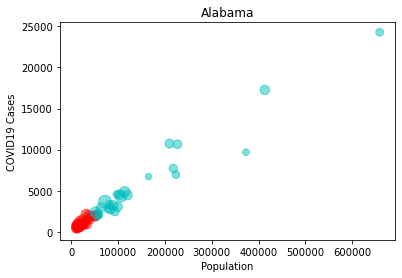

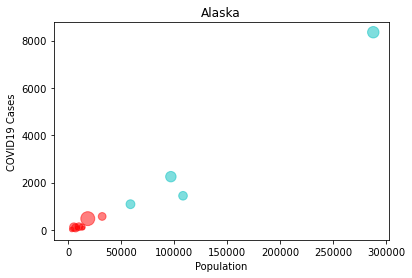

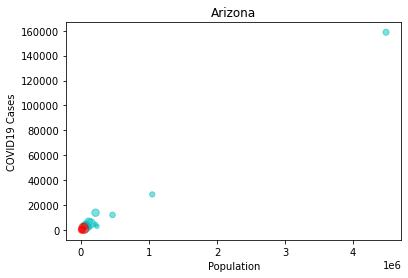

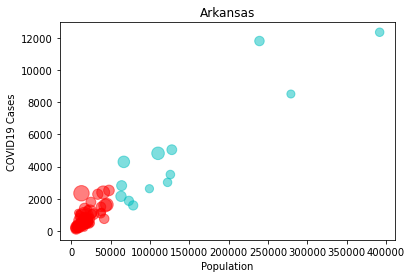

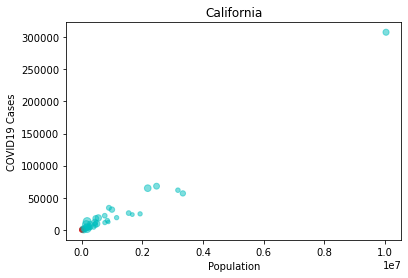

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


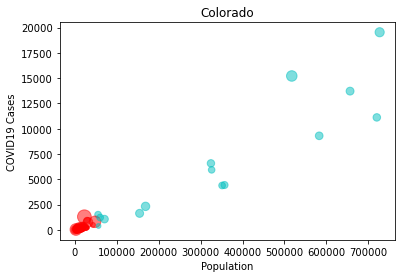

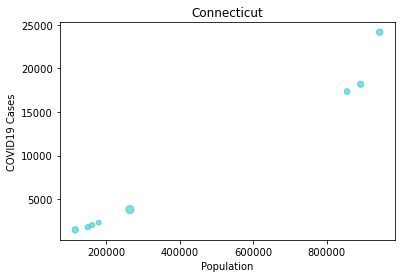

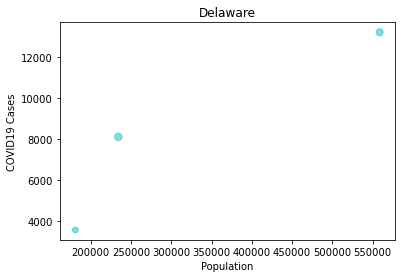

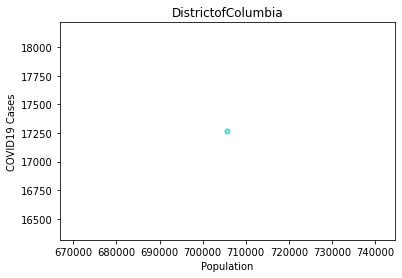

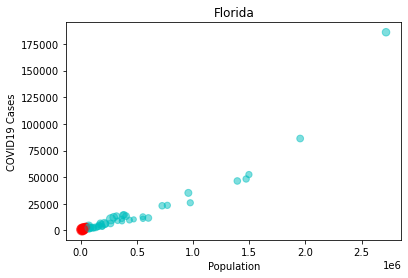

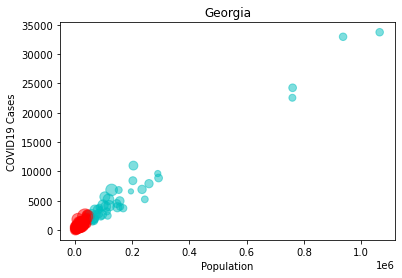

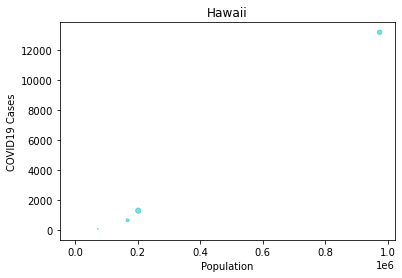

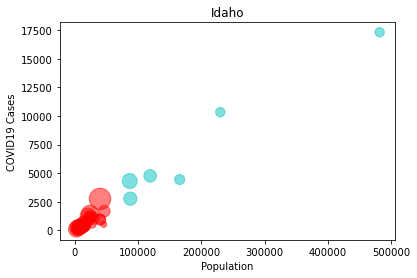

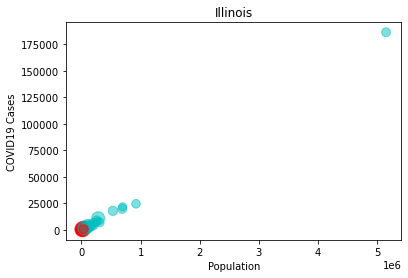

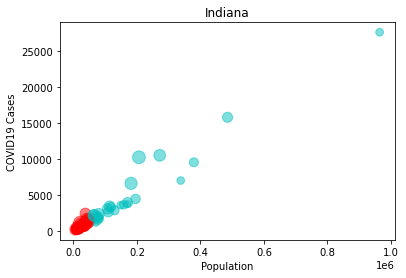

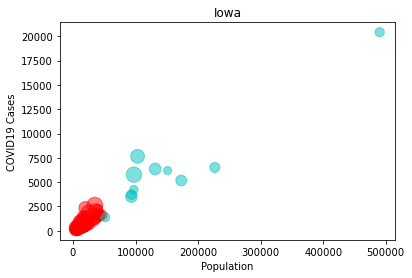

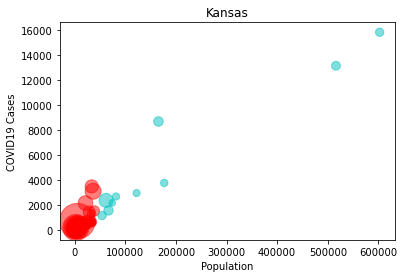

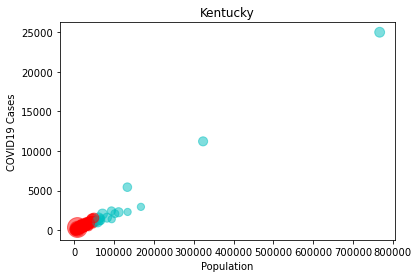

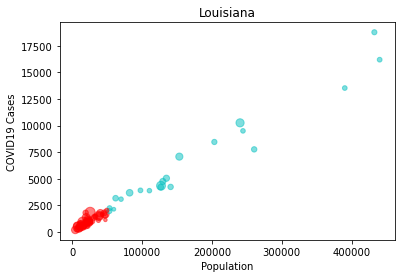

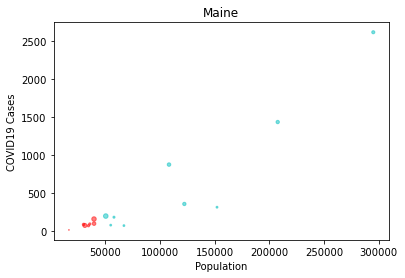

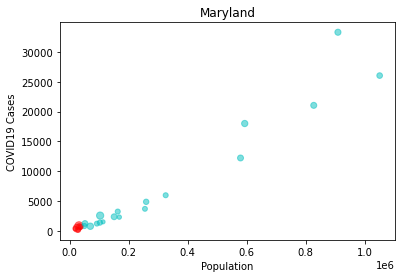

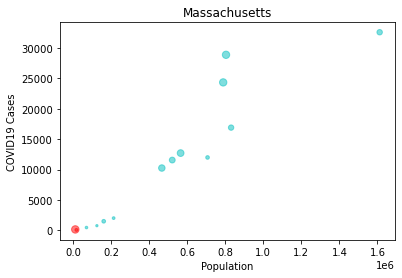

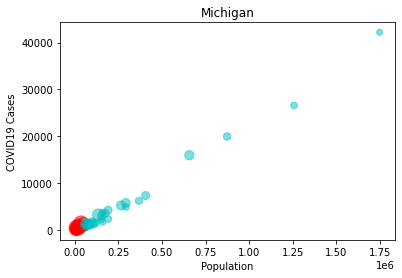

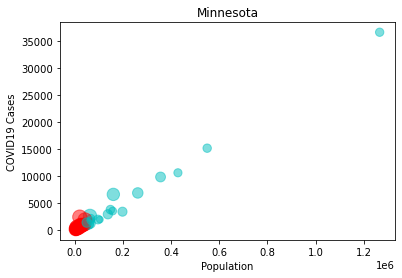

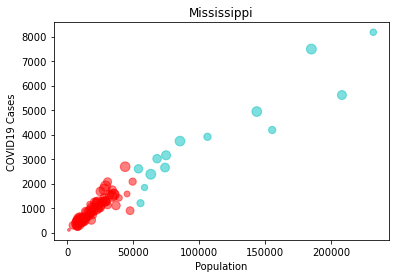

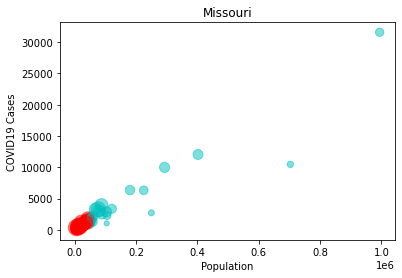

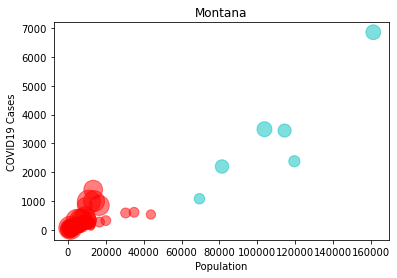

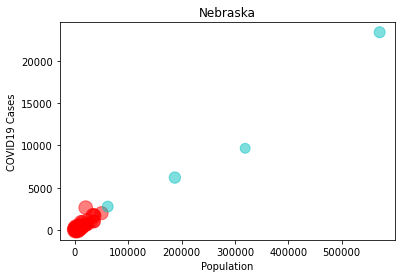

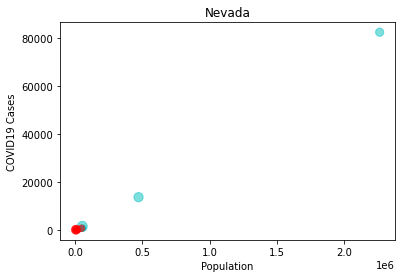

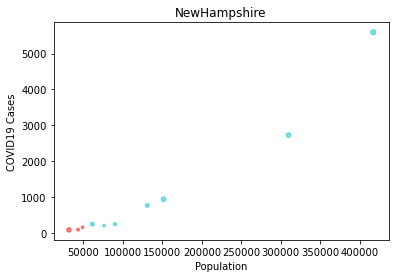

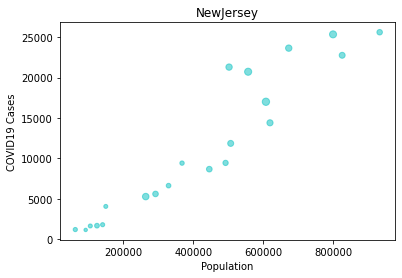

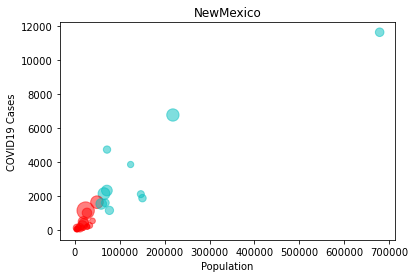

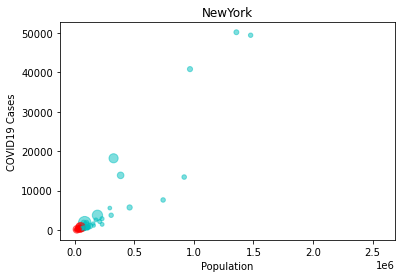

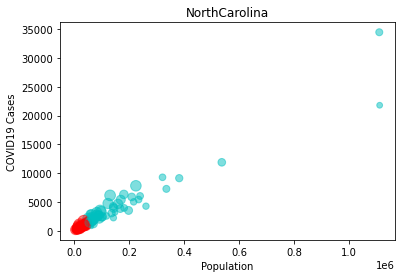

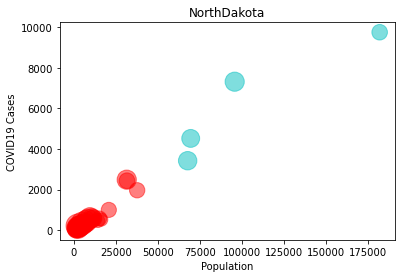

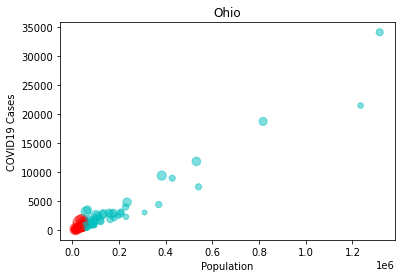

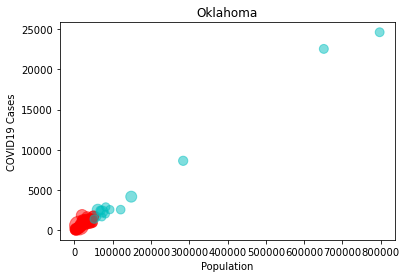

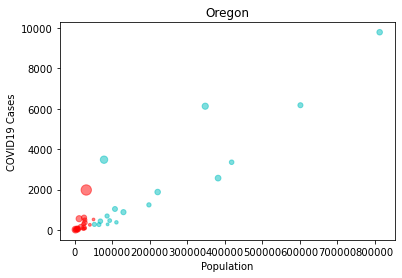

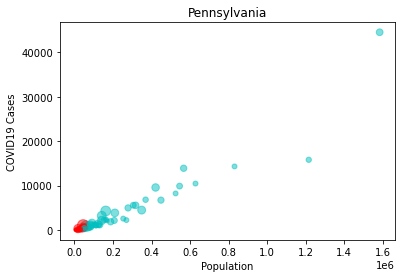

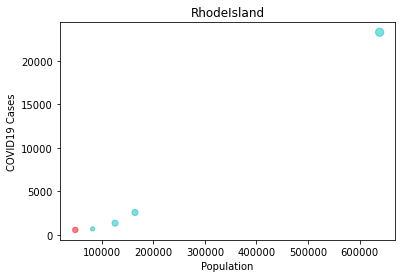

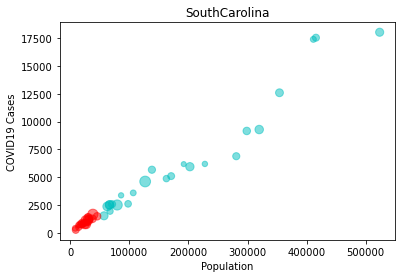

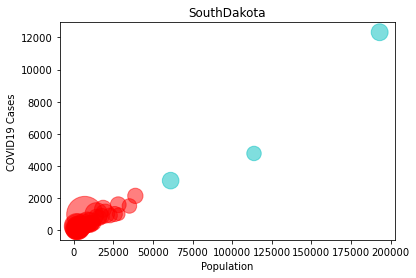

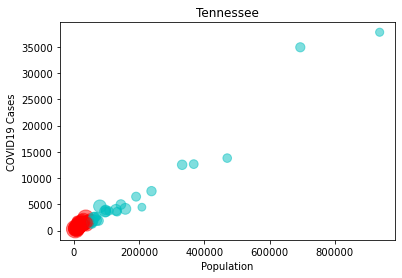

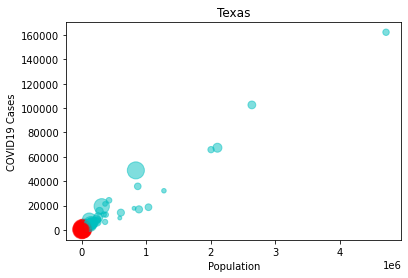

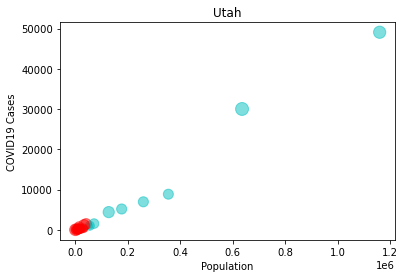

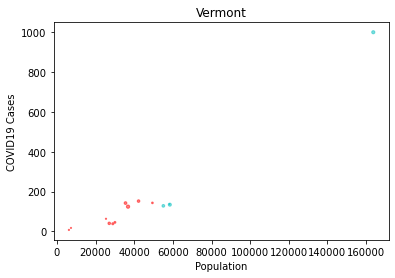

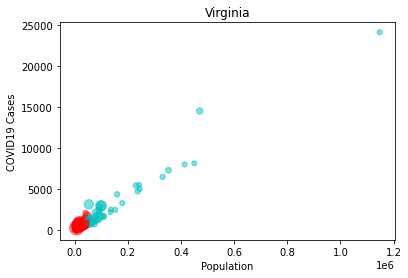

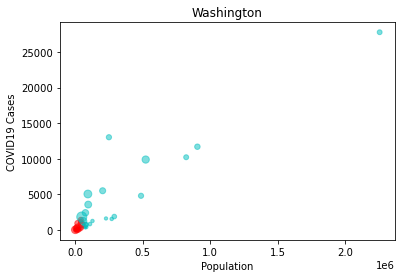

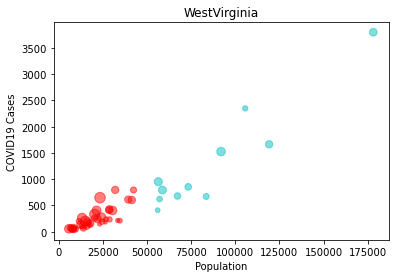

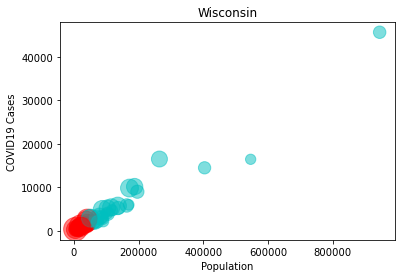

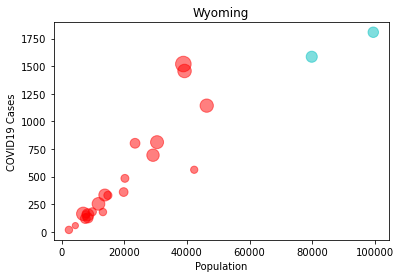

In [21]:
city_type = {'rural': 'r', 'urban': 'c'}
for i in range(51):
    state_df = ru_df[ru_df['state']==np.unique(ru_df.state)[i]]
    plt.scatter(x='populationCDS', y = 'oct_2020_cases',
                data = state_df,
                c=state_df['rural_urban'].map(city_type), 
               s = list(state_df['percent_change']*100), alpha = 0.5)
    plt.title(np.unique(ru_df.state)[i])
    plt.xlabel('Population')
    plt.ylabel('COVID19 Cases')
    plt.show()

## Rural COVID Deaths by County

We've seen a trend in the county-level COVID19 cases but are unsure of whether or not rural counties have a difference in fatality from COVID19 compared to their urban counterparts. I will explore this relationship in a similiar style as that of the COVID cases.

In [12]:
county_deaths = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : list(counties_df['id']),
            "expressions" : ["NYT_ConfirmedDeaths"],
            "start" : "2020-09-01",
            "end" : '2020-10-31',
            "interval" : "MONTH",
        }
    },
    get_all = True
)

county_deaths

,dates,Abbeville_SouthCarolina_UnitedStates.NYT_ConfirmedDeaths.data,Abbeville_SouthCarolina_UnitedStates.NYT_ConfirmedDeaths.missing,Acadia_Louisiana_UnitedStates.NYT_ConfirmedDeaths.data,Acadia_Louisiana_UnitedStates.NYT_ConfirmedDeaths.missing,Adair_Iowa_UnitedStates.NYT_ConfirmedDeaths.data,Adair_Iowa_UnitedStates.NYT_ConfirmedDeaths.missing,Adair_Oklahoma_UnitedStates.NYT_ConfirmedDeaths.data,Adair_Oklahoma_UnitedStates.NYT_ConfirmedDeaths.missing,Adams_Idaho_UnitedStates.NYT_ConfirmedDeaths.data,...,York_SouthCarolina_UnitedStates.NYT_ConfirmedDeaths.data,York_SouthCarolina_UnitedStates.NYT_ConfirmedDeaths.missing,York_Pennsylvania_UnitedStates.NYT_ConfirmedDeaths.data,York_Pennsylvania_UnitedStates.NYT_ConfirmedDeaths.missing,Young_Texas_UnitedStates.NYT_ConfirmedDeaths.data,Young_Texas_UnitedStates.NYT_ConfirmedDeaths.missing,Zavala_Texas_UnitedStates.NYT_ConfirmedDeaths.data,Zavala_Texas_UnitedStates.NYT_ConfirmedDeaths.missing,Ziebach_SouthDakota_UnitedStates.NYT_ConfirmedDeaths.data,Ziebach_SouthDakota_UnitedStates.NYT_ConfirmedDeaths.missing
0,2020-09-01,13,0,99,0,1,0,10,0,2,...,75,0,159,0,6,0,16,0,0,0
0,2020-10-01,17,0,101,0,1,0,11,0,2,...,107,0,207,0,10,0,19,0,2,0


Reshaping the Data for more human readable formatting

In [13]:
# saving original raw county_deaths to csv
cd_updated = county_deaths.set_index('dates').T
cd_updated.to_csv('raw_county_deaths0910.csv', index = False)

In [14]:
cd_df = cd_updated.reset_index()

#getting State and County and County Equivalent names from the ['index'] string
cd_full_names = cd_df['index'].tolist()
cd_split_names = [str(cd_full_names[x]).split("_") for x in range(len(cd_full_names))]
cd_county_names = [cd_split_names[x][0] for x in range(len(cd_split_names))]
cd_state_names = [cd_split_names[x][1] for x in range(len(cd_split_names))]

# adding it to the data frame
cd_df["county"] = cd_county_names
cd_df["state"] = cd_state_names

In [15]:
cd_df

dates,index,2020-09-01 00:00:00,2020-10-01 00:00:00,county,state
0,Abbeville_SouthCarolina_UnitedStates.NYT_Confi...,13,17,Abbeville,SouthCarolina
1,Abbeville_SouthCarolina_UnitedStates.NYT_Confi...,0,0,Abbeville,SouthCarolina
2,Acadia_Louisiana_UnitedStates.NYT_ConfirmedDea...,99,101,Acadia,Louisiana
3,Acadia_Louisiana_UnitedStates.NYT_ConfirmedDea...,0,0,Acadia,Louisiana
4,Adair_Iowa_UnitedStates.NYT_ConfirmedDeaths.data,1,1,Adair,Iowa
...,...,...,...,...,...
6299,Young_Texas_UnitedStates.NYT_ConfirmedDeaths.m...,0,0,Young,Texas
6300,Zavala_Texas_UnitedStates.NYT_ConfirmedDeaths....,16,19,Zavala,Texas
6301,Zavala_Texas_UnitedStates.NYT_ConfirmedDeaths....,0,0,Zavala,Texas
6302,Ziebach_SouthDakota_UnitedStates.NYT_Confirmed...,0,2,Ziebach,SouthDakota


In [22]:
# keeping only data rows, not missing data rows
cd_df = cd_df[cd_df['index'].str.endswith(".data")]
# write to csv file
cd_df.to_csv('cleaned_county_deaths_0910.csv', index = False)

# renaming cols
key = [cd_df.columns[i] for i in range(5)]
value = ['id', 'sept_2020', 'oct_2020', 'county', 'state']
col_dict = {k:v for (k,v) in zip(key,value)}
# subsetting df for county,state, and only september and october case counts because just started november (as of 11.4.2020)
deaths_septoct = cd_df.rename(columns = col_dict).iloc[:, [-2,-1,1,2]]

In [24]:
# merging the rvu (rural versus urban) table and the county cases in sept oct (ccase_septoct)
ru_deaths_df = rvu.merge(deaths_septoct, 'inner', on = ['county', 'state'])
# adding column for proportion of population infected, percent increase over month
ru_deaths_df['sept_percent'] = ru_deaths_df["sept_2020"]/ru_deaths_df['populationCDS']*100
ru_deaths_df['oct_percent'] = ru_deaths_df["oct_2020"]/ru_deaths_df['populationCDS']*100
ru_deaths_df['percent_change'] = (ru_deaths_df["oct_2020"]-ru_deaths_df["sept_2020"])/ru_deaths_df['populationCDS']*100
ru_deaths_df

,county,state,fips.id,populationCDS,rural_urban,sept_2020,oct_2020,sept_percent,oct_percent,percent_change
0,Abbeville,SouthCarolina,45001,24527.0,rural,13,17,0.0530028,0.0693114,0.0163086
1,Acadia,Louisiana,22001,62045.0,urban,99,101,0.159562,0.162785,0.00322347
2,Accomack,Virginia,51001,32316.0,rural,19,19,0.0587944,0.0587944,0
3,Ada,Idaho,16001,481587.0,urban,148,180,0.0307317,0.0373764,0.0066447
4,Adair,Iowa,19001,7152.0,rural,1,1,0.0139821,0.0139821,0
...,...,...,...,...,...,...,...,...,...,...
3147,Yuma,Arizona,04027,213787.0,urban,345,358,0.161376,0.167456,0.00608082
3148,Yuma,Colorado,08125,10019.0,rural,1,1,0.00998104,0.00998104,0
3149,Zapata,Texas,48505,14179.0,rural,6,9,0.0423161,0.0634742,0.0211581
3150,Zavala,Texas,48507,11840.0,rural,16,19,0.135135,0.160473,0.0253378


### Exporitng cleaned dataframe to csv format

In [25]:
ru_deaths_df.to_csv("rural_urban_sept_oct_casedeath.csv", index = False)

## Visualizing Trends in COVID Fatality by Rural and Urban Settings

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


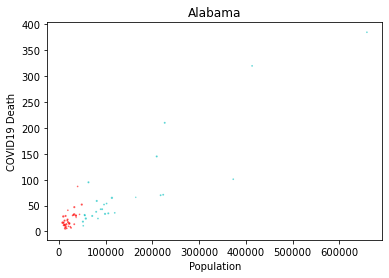

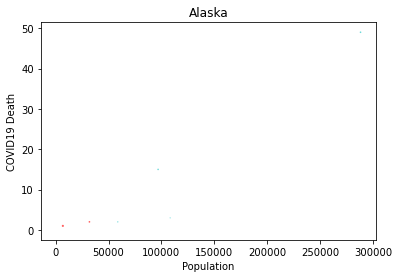

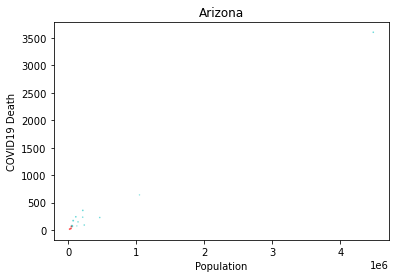

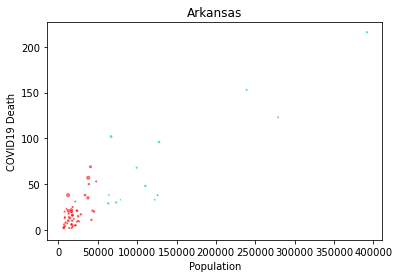

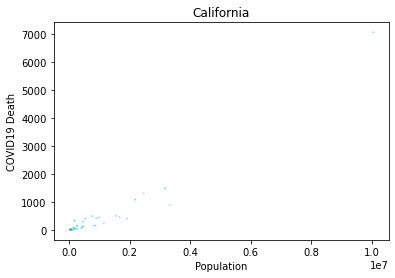

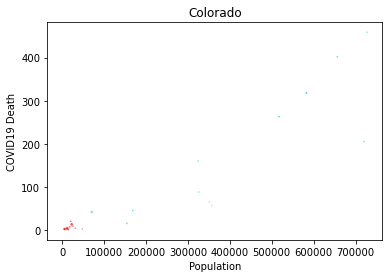

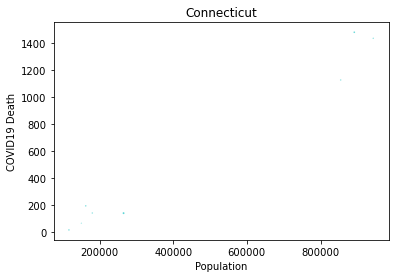

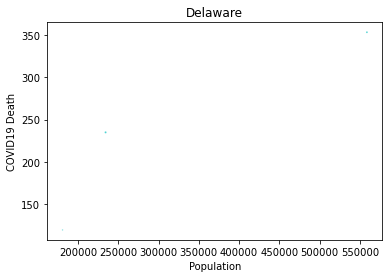

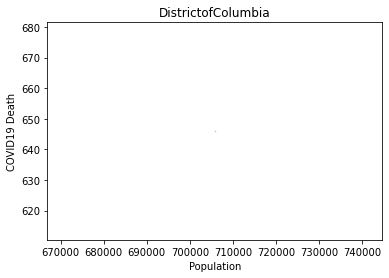

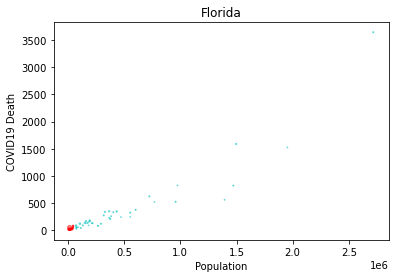

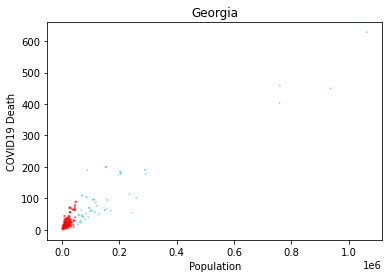

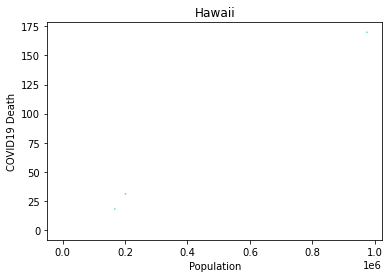

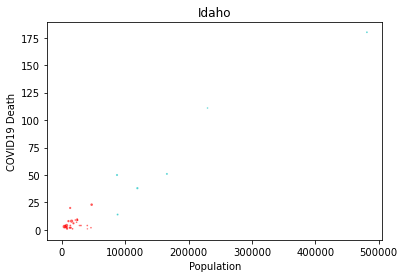

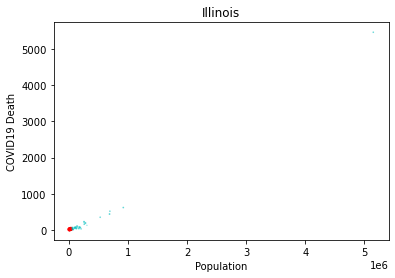

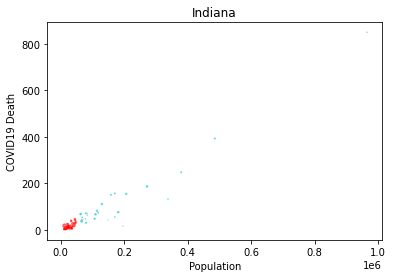

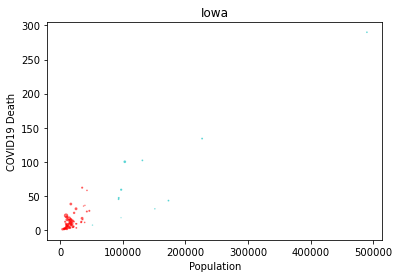

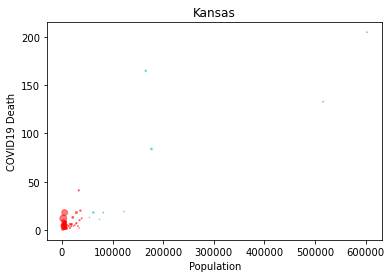

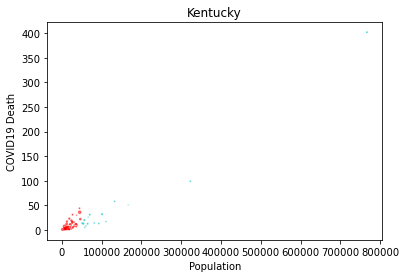

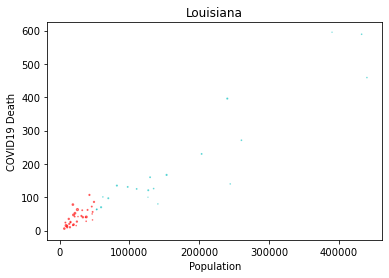

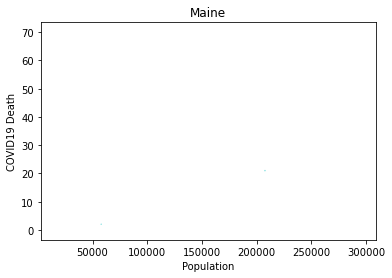

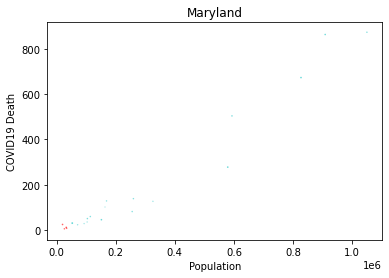

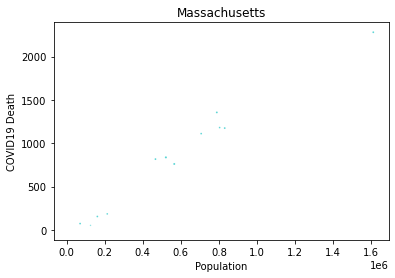

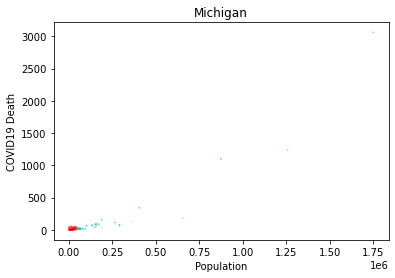

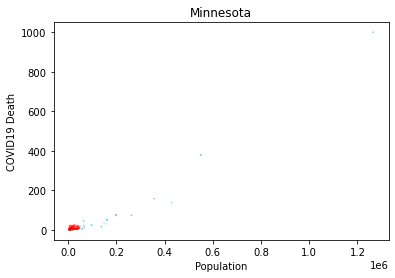

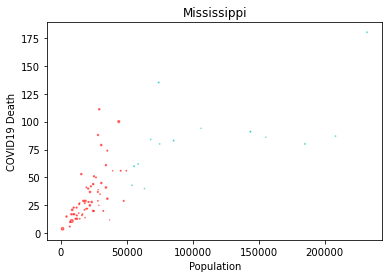

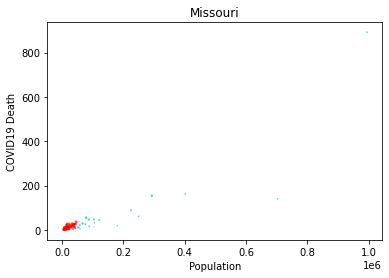

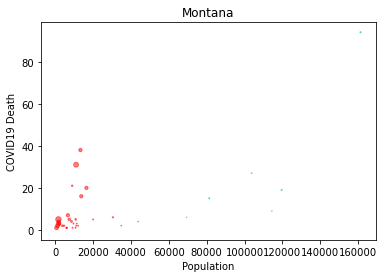

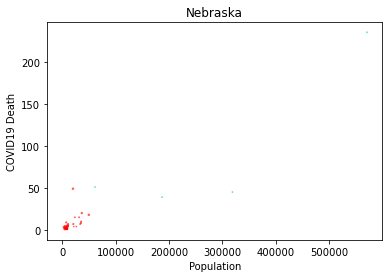

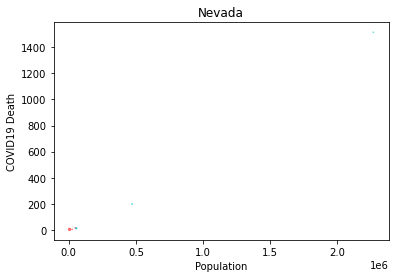

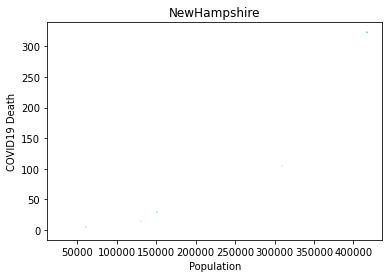

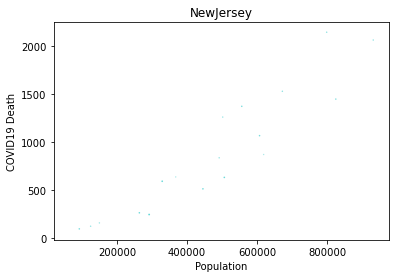

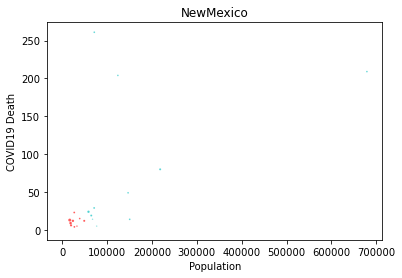

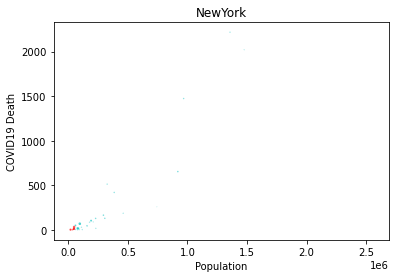

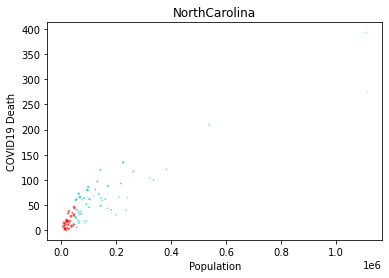

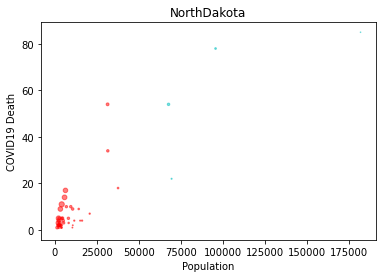

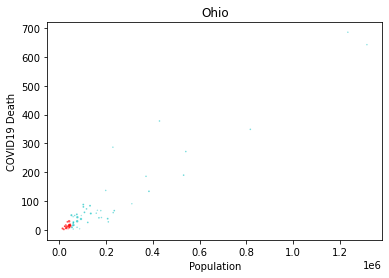

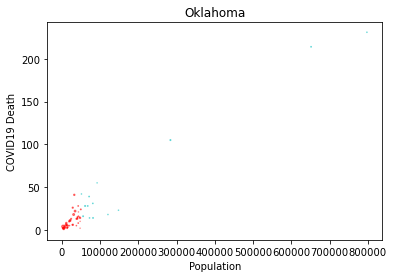

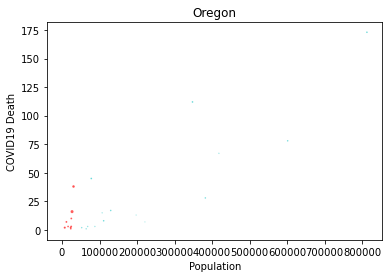

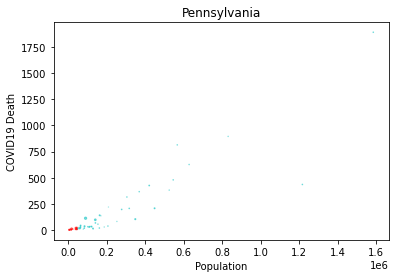

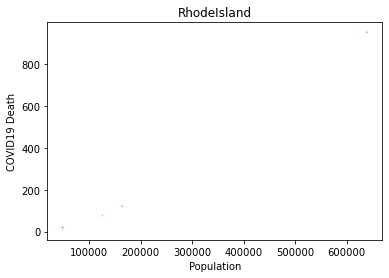

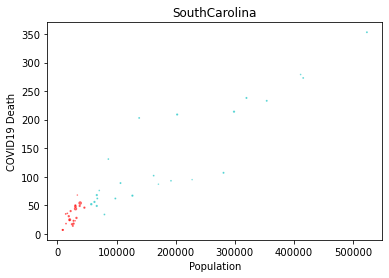

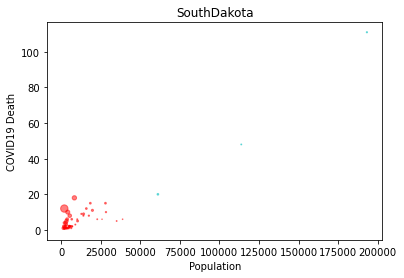

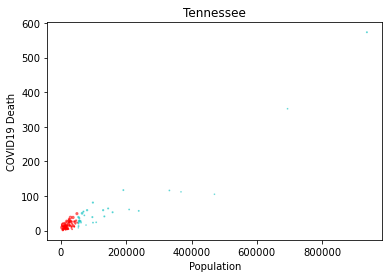

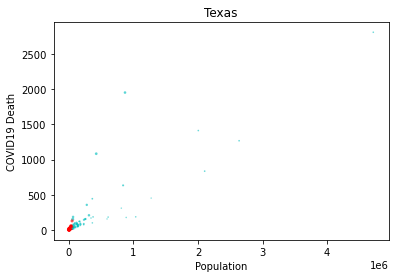

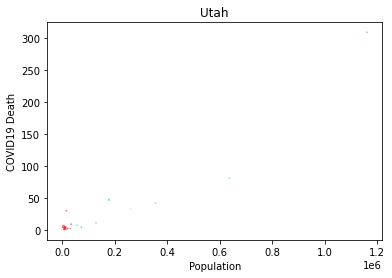

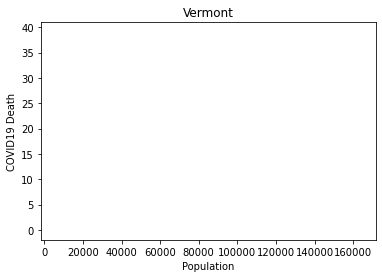

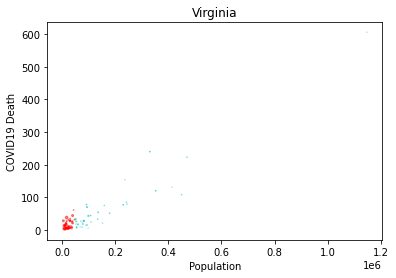

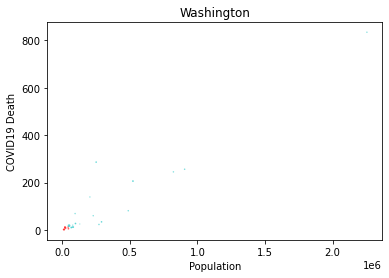

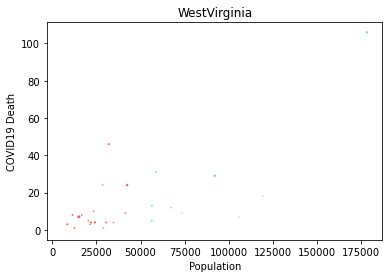

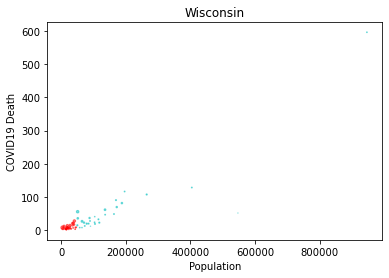

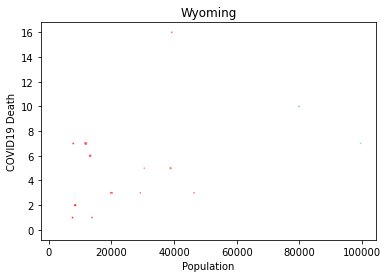

In [20]:
city_type = {'rural': 'r', 'urban': 'c'}
for i in range(51):
    state_df = ru_deaths_df[ru_deaths_df['state']==np.unique(ru_deaths_df.state)[i]]
    plt.scatter(x='populationCDS', y = 'oct_2020_deaths',
                data = state_df,
                c=state_df['rural_urban'].map(city_type), 
               s = list(state_df['percent_change']*100), alpha = 0.5)
    plt.title(np.unique(ru_deaths_df.state)[i])
    plt.xlabel('Population')
    plt.ylabel('COVID19 Death')
    plt.show()